<a href="https://colab.research.google.com/github/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Armanda Lewis (al861@nyu.edu)

Fall 2024 - Deep Learning

CS-GY 6953 / ECE-GY 7123

Professor Sandoval


#####First let's work with the data. I modified the Delidata to map to my inclusion rubric, and found synerygy between the annotation labels of: Agree, Disagree, Moderation, Reasoning, and Solution. There are also no labels for what was not annotated according to this rubric.  I am starting with these since they map to aspects of my definition of inclusion.  See citation at: https://arxiv.org/abs/2108.05271.

My goal is a multi classification task of the annotation_target column, but the data does need cleaning. See separate notebook.


In [2]:
# Install Pytorch
%pip install "torch==2.2.2" tensorboard

# Install Hugging Face libraries
%pip install  --upgrade "transformers==4.40.0" "datasets==2.18.0" "accelerate==0.29.3" "evaluate==0.4.1" "bitsandbytes==0.43.1" "huggingface_hub==0.22.2" "trl==0.8.6" "peft==0.10.0"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 11.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17

I used the lab notebook on finetuning LLMs as a starting point, and made sure to use Lora for fast(er) finetuning.  


#### **Fine-tuning for sequential classification - inclusion**

First, I need the data, and I mention in my report the prework that was done.  I consulted https://huggingface.co/docs/transformers/main/en/model_doc/llama for some of the transformer code.



##### **Use huggingface to import llama 3.1-8B model**




In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGr

##### Import necessary libraries

In [2]:
import os
import random
import functools
import csv
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import evaluate

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score

from datasets import Dataset, DatasetDict
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)


#### **Load my data - I mapped this to my "belonging" aspect for inclusion**


In [3]:
df = pd.read_csv("dial_classification4.csv")
df

,instruction,summary,label,target
0,Categorize the dialogue snippet into one of th...,"Okay we need to select three , an vowel a cons...",Solution,5
1,Categorize the dialogue snippet into one of th...,you would also need to check the because if i...,Reasoning,4
2,Categorize the dialogue snippet into one of th...,Specifically to test the rule it seems to me...,Solution,5
3,Categorize the dialogue snippet into one of th...,"Yeah , since it didn''t say an even number has...",Reasoning,4
4,Categorize the dialogue snippet into one of th...,me too,Agree,0
...,...,...,...,...
8557,Categorize the dialogue snippet into one of th...,'because it doesn''t say that only vowels can ...,Reasoning,4
8558,Categorize the dialogue snippet into one of th...,'Even numbers don''t have to have vowels on th...,Reasoning,4
8559,Categorize the dialogue snippet into one of th...,think it is wrong but what the heck,Disagree,1
8560,Categorize the dialogue snippet into one of th...,"I agree , I think and are the only onese we ...",Agree,0



####Convert my target column into a category type for later

In [4]:
df['label']=df['label'].astype('category')
df['target']=df['label'].cat.codes

df.head()

,instruction,summary,label,target
0,Categorize the dialogue snippet into one of th...,"Okay we need to select three , an vowel a cons...",Solution,4
1,Categorize the dialogue snippet into one of th...,you would also need to check the because if i...,Reasoning,3
2,Categorize the dialogue snippet into one of th...,Specifically to test the rule it seems to me...,Solution,4
3,Categorize the dialogue snippet into one of th...,"Yeah , since it didn''t say an even number has...",Reasoning,3
4,Categorize the dialogue snippet into one of th...,me too,Agree,0


In [5]:
df['label'].cat.categories

Index(['Agree', 'Disagree', 'Moderation', 'Reasoning', 'Solution'], dtype='object')

In [29]:
category_map = {code: category for code, category in enumerate(df['label'].cat.categories)}
category_map
num_cats = len(category_map)
num_cats #will need this later when I specify my model task

5

#### Split into splits (train: 60%; validation: 20%; test: 20%)

I do have uneven classes, which I will try to tweak on a second pass.

In [7]:
train_end_point = int(df.shape[0]*0.6)
val_end_point = int(df.shape[0]*0.8)
df_train = df.iloc[:train_end_point,:]
df_val = df.iloc[train_end_point:val_end_point,:]
df_test = df.iloc[val_end_point:,:]
print(df_train.shape, df_test.shape, df_val.shape)



(5137, 4) (1713, 4) (1712, 4)


#### Convert from Pandas DataFrame to Hugging Face Dataset for dictionary format that HF likes



In [8]:
# Converting pandas DataFrames into Hugging Face Dataset objects:
dataset_train = Dataset.from_pandas(df_train.drop('label',axis=1))
dataset_val = Dataset.from_pandas(df_val.drop('label',axis=1))
dataset_test = Dataset.from_pandas(df_test.drop('label',axis=1))


In [9]:
# Shuffle the training dataset
dataset_train_shuffled = dataset_train.shuffle(seed=42)  # Using a seed for reproducibility


In [10]:
# Combine them into a single DatasetDict
dataset = DatasetDict({
    'train': dataset_train_shuffled,
    'val': dataset_val,
    'test': dataset_test
})
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'summary', 'target'],
        num_rows: 5137
    })
    val: Dataset({
        features: ['instruction', 'summary', 'target'],
        num_rows: 1712
    })
    test: Dataset({
        features: ['instruction', 'summary', 'target'],
        num_rows: 1713
    })
})

In [11]:
dataset['train']

Dataset({
    features: ['instruction', 'summary', 'target'],
    num_rows: 5137
})

* Since our classes are not balanced let's calculate class weights based on inverse value counts
* Convert to pytorch tensor since we will need it

In [12]:
df_train.target.value_counts(normalize=True)

,proportion
target,
3,0.419506
4,0.310687
0,0.189605
2,0.069885
1,0.010317


In [13]:
class_weights=(1/df_train.target.value_counts(normalize=True).sort_index()).tolist()
class_weights=torch.tensor(class_weights)
class_weights=class_weights/class_weights.sum()
class_weights


tensor([0.0432, 0.7937, 0.1172, 0.0195, 0.0264])

#### **Load and customize llama for training**

I consulted the lab notebooks for this!

In [14]:
model_name = "meta-llama/Meta-Llama-3-8B"

#### Quantization Config (for QLORA)

In [15]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit = True, # enable 4-bit quantization
    bnb_4bit_quant_type = 'nf4', # information theoretically optimal dtype for normally distributed weights
    bnb_4bit_use_double_quant = True, # quantize quantized weights //insert xzibit meme
    bnb_4bit_compute_dtype = torch.bfloat16 # optimized fp format for ML
)


#### Lora Config

In [16]:
lora_config = LoraConfig(
    r = 16, # the dimension of the low-rank matrices
    lora_alpha = 8, # scaling factor for LoRA activations vs pre-trained weight activations
    target_modules = ['q_proj', 'k_proj', 'v_proj', 'o_proj'],
    lora_dropout = 0.05, # dropout probability of the LoRA layers
    bias = 'none', # wether to train bias weights, set to 'none' for attention layers
    task_type = 'SEQ_CLS'
)

#### Load model
As I mention in the report, I am doing a sequential classification task for multiclass prediction.

In [30]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    num_labels=num_cats
)

model

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at meta-llama/Meta-Llama-3-8B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LlamaForSequenceClassification(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )


* prepare_model_for_kbit_training() function to preprocess the quantized model for training (see lab notes)

In [31]:
model = prepare_model_for_kbit_training(model)
model

LlamaForSequenceClassification(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )


prepares a model for training with LoRA (also see lab notes)

In [33]:
model = get_peft_model(model, lora_config)
model

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): PeftModelForSequenceClassification(
      (base_model): LoraModel(
        (model): LlamaForSequenceClassification(
          (model): LlamaModel(
            (embed_tokens): Embedding(128256, 4096)
            (layers): ModuleList(
              (0-31): 32 x LlamaDecoderLayer(
                (self_attn): LlamaSdpaAttention(
                  (q_proj): lora.Linear4bit(
                    (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.05, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=4096, out_features=16, bias=False)
                    )
                    (lora_B): ModuleDict(
                      (default): Linear(in_features=16, out_features=4096, bias=False)
                    )
                    (

#### Load the tokenizer

As mentioned in lab, be sure to add EOS token or training will go on forever!

In [34]:
tokenizer = AutoTokenizer.from_pretrained(model_name, add_prefix_space=True)

tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.pad_token = tokenizer.eos_token

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


#### Update some model configs
* Must use .cache = False as below or it crashes from my experience

In [35]:
model.config.pad_token_id = tokenizer.pad_token_id
model.config.use_cache = False
model.config.pretraining_tp = 1

#### Trial run to see output

In [36]:
blurbs = df_test.summary.tolist()
v[0:2]

['Yes we all said the letter  is one of the cards to flip',
 'we dont care about  , it could be any letter']

In [37]:
# Convert summaries to a list
blurbs = df_test.summary.tolist()

# Define the batch size
batch_size = 32  # You can adjust this based on your system's memory capacity

# Initialize an empty list to store the model outputs
all_outputs = []

# Process the sentences in batches
for i in range(0, len(blurbs), batch_size):
    # Get the batch
    batch_blurbs = blurbs[i:i + batch_size]

# Ensure all elements in batch_blurbs are strings
#I kept getting this error, and it ened up being that I was passing some text that was not
#encoded as string, so I am forcing that in this step
    batch_blurbs = [str(blurb) for blurb in batch_blurbs]  # Convert to string if not already

    # Tokenize the batch
    inputs = tokenizer(batch_blurbs, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move tensors to the device where the model is (e.g., GPU or CPU)
    inputs = {k: v.to('cuda' if torch.cuda.is_available() else 'cpu') for k, v in inputs.items()}

    # Perform inference and store the logits
    with torch.no_grad():
        outputs = model(**inputs)
        all_outputs.append(outputs['logits'])



#### Get single tensor

In [38]:
final_outputs = torch.cat(all_outputs, dim=0)
final_outputs

tensor([[-6.7287, -3.0319, -2.2748, -0.0600, -5.4021],
        [ 0.2154,  1.1259, -1.1849, -2.3218, -2.6040],
        [-1.5704, -1.9556, -2.6907,  5.4208, -1.9960],
        ...,
        [-2.8632, -2.4076, -4.5063, -0.0076, -0.6542],
        [ 0.8127, -2.6551, -0.9128,  5.9083, -2.0607],
        [-4.1644,  1.4074, -0.8350, -3.2515,  0.2783]], device='cuda:0')

* argmax to get class prediction

In [39]:
final_outputs.argmax(axis=1)

tensor([3, 1, 3,  ..., 3, 3, 1], device='cuda:0')

#### Get some predictions

In [40]:
df_test['predictions']=final_outputs.argmax(axis=1).cpu().numpy()
df_test['predictions']

<ipython-input-40-7c1d2547ae19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions']=final_outputs.argmax(axis=1).cpu().numpy()


,predictions
6849,3
6850,1
6851,3
6852,4
6853,3
...,...
8557,3
8558,3
8559,3
8560,3


In [41]:
df_test['predictions'].value_counts()

,count
predictions,
3,992
2,225
1,196
4,154
0,146


#### Use category map to get back category names

In [42]:
df_test['predictions']=df_test['predictions'].apply(lambda l:category_map[l])
df_test['predictions']

<ipython-input-42-b56fb9d5a919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions']=df_test['predictions'].apply(lambda l:category_map[l])


,predictions
6849,Reasoning
6850,Disagree
6851,Reasoning
6852,Solution
6853,Reasoning
...,...
8557,Reasoning
8558,Reasoning
8559,Reasoning
8560,Reasoning


#### Analyze performance with matrix

In [43]:
def get_performance_metrics(df_test):
  y_test = df_test.label
  y_pred = df_test.predictions

  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
  print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [44]:
get_performance_metrics(df_test)

Confusion Matrix:
[[ 29  20 101 101  44]
 [  0   3   3  10   2]
 [ 12   5   4  98  16]
 [ 73  75  84 443  42]
 [ 32  93  33 340  50]]

Classification Report:
              precision    recall  f1-score   support

       Agree       0.20      0.10      0.13       295
    Disagree       0.02      0.17      0.03        18
  Moderation       0.02      0.03      0.02       135
   Reasoning       0.45      0.62      0.52       717
    Solution       0.32      0.09      0.14       548

    accuracy                           0.31      1713
   macro avg       0.20      0.20      0.17      1713
weighted avg       0.33      0.31      0.29      1713

Balanced Accuracy Score: 0.20073888374793677
Accuracy Score: 0.30881494454173963


This is not so good. Fingers crossed that the finetuned version will be better.  Reasoning is doing the best.

# Trainer Components
* model
* tokenizer
* training arguments
* train dataset
* eval dataset
* Data Collater
* Compute Metrics
* class_weights: In our case since we are using a custom trainer so we can use a weighted loss we will subclass trainer and define the custom loss.

#### Get ready for llama finetuning

In [46]:
MAX_LEN = 512
col_to_delete = ['instruction', 'summary']

def llama_preprocessing_function(examples):
    examples['summary'] = [str(sentence) for sentence in examples['summary']]

    return tokenizer(examples['summary'], truncation=True, max_length=MAX_LEN)

tokenized_datasets = dataset.map(llama_preprocessing_function, batched=True, remove_columns=col_to_delete)
tokenized_datasets = tokenized_datasets.rename_column("target", "label")
tokenized_datasets.set_format("torch")

Map:   0%|          | 0/5137 [00:00<?, ? examples/s]

Map:   0%|          | 0/1712 [00:00<?, ? examples/s]

Map:   0%|          | 0/1713 [00:00<?, ? examples/s]

## Data Collator - gotten from Hugging face base code
A **data collator** prepares batches of data for training or inference in ML/DL.

In [47]:
collate_fn = DataCollatorWithPadding(tokenizer=tokenizer)


#### specify eval metrics (accuracy)

In [48]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'balanced_accuracy' : balanced_accuracy_score(predictions, labels),'accuracy':accuracy_score(predictions,labels)}



#### Define custom trainer with classweights
* We will have a custom loss function that deals with the class weights --> my classes are imbalanced, so this is important

In [49]:
class CustomTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        # Ensure label_weights is a tensor
        if class_weights is not None:
            self.class_weights = torch.tensor(class_weights, dtype=torch.float32).to(self.args.device)
        else:
            self.class_weights = None

    def compute_loss(self, model, inputs, return_outputs=False):
        # Extract labels and convert them to long type for cross_entropy
        labels = inputs.pop("labels").long()

        # Forward pass
        outputs = model(**inputs)

        # Extract logits assuming they are directly outputted by the model
        logits = outputs.get('logits')

        # Compute custom loss with class weights for imbalanced data handling
        if self.class_weights is not None:
            loss = F.cross_entropy(logits, labels, weight=self.class_weights)
        else:
            loss = F.cross_entropy(logits, labels)

        return (loss, outputs) if return_outputs else loss


#### define training args

#### Set args and trainer hyperparameters

In [ ]:
training_args = TrainingArguments(
    output_dir = 'inclusive_classification',
    learning_rate = 1e-4,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size = 8,
    num_train_epochs = 2,
    weight_decay = 0.01,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True
)

In [51]:
trainer = CustomTrainer(
    model = model,
    args = training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['val'],
    tokenizer = tokenizer,
    data_collator = collate_fn,
    compute_metrics = compute_metrics,
    class_weights=class_weights,
)

<ipython-input-49-1bea759fa04e>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.class_weights = torch.tensor(class_weights, dtype=torch.float32).to(self.args.device)


#### Let's train
Cite:  https://huggingface.co/docs/transformers/en/training

In [52]:
train_result = trainer.train()
#I am using wandb for tracking

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Balanced Accuracy,Accuracy
1,1.013200,0.701274,0.673812,0.816005
2,0.552000,0.578135,0.737092,0.844042


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [54]:
average_training_loss = train_result.training_loss
print(f"Average Training Loss: {average_training_loss}")

Average Training Loss: 0.7206311500276414


In [56]:
# Accessing the training log history
log_history = trainer.state.log_history

# Extract loss values
losses = [entry['loss'] for entry in log_history if 'loss' in entry]
steps = list(range(1, len(losses) + 1))

# Print loss data
#print(losses)

In [57]:
losses_df_llama3_1 = pd.DataFrame({
    "Losses": losses,
    "Steps": steps
})

losses_df_llama3_1.to_csv("losses_df_llama3_1.csv", index=False)
print("Submission file saved as 'losses_df_llama3_1.csv")

Submission file saved as 'losses_df_llama3_1.csv


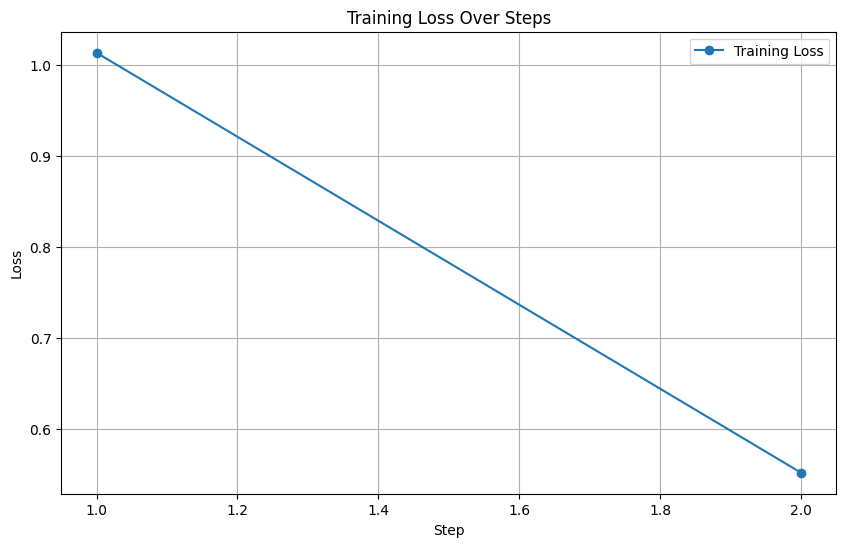

In [59]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, marker='o', linestyle='-', label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss Over Steps')
plt.legend()
plt.grid()
plt.show()

#### Let's check the results
* I wrapped in a function

In [65]:
def make_predictions(model,df_test):


  # Convert summaries to a list
  sentences = df_test.summary.tolist()

  # Define the batch size
  batch_size = 32  # You can adjust this based on your system's memory capacity

  # Initialize an empty list to store the model outputs
  all_outputs = []

  # Process the blurbs in batches
  for i in range(0, len(blurbs), batch_size):
      # Get the batch of blurbs
      batch_blurbs = blurbs[i:i + batch_size]

# Ensure all elements in batch_blurbs are strings THIS WAS WHAT I WAS MISSING!
      batch_blurbs = [str(blurb) for blurb in batch_blurbs]  # Convert to string if not already

      # Tokenize the batch
      inputs = tokenizer(batch_blurbs, return_tensors="pt", padding=True, truncation=True, max_length=512)

      # Move tensors to the device where the model is (e.g., GPU or CPU)
      inputs = {k: v.to('cuda' if torch.cuda.is_available() else 'cpu') for k, v in inputs.items()}

      # Perform inference and store the logits
      with torch.no_grad():
          outputs = model(**inputs)
          all_outputs.append(outputs['logits'])
  final_outputs = torch.cat(all_outputs, dim=0)
  df_test['predictions']=final_outputs.argmax(axis=1).cpu().numpy()
  df_test['predictions']=df_test['predictions'].apply(lambda l:category_map[l])


make_predictions(model,df_test)

<ipython-input-65-911dfffa1f13>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions']=final_outputs.argmax(axis=1).cpu().numpy()
<ipython-input-65-911dfffa1f13>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions']=df_test['predictions'].apply(lambda l:category_map[l])


In [67]:
get_performance_metrics(df_test)

Confusion Matrix:
[[267   0   1   9  18]
 [  4   5   0   7   2]
 [  5   2 120   0   8]
 [ 15   2  12 629  59]
 [ 26   2  12  84 424]]

Classification Report:
              precision    recall  f1-score   support

       Agree       0.84      0.91      0.87       295
    Disagree       0.45      0.28      0.34        18
  Moderation       0.83      0.89      0.86       135
   Reasoning       0.86      0.88      0.87       717
    Solution       0.83      0.77      0.80       548

    accuracy                           0.84      1713
   macro avg       0.76      0.74      0.75      1713
weighted avg       0.84      0.84      0.84      1713

Balanced Accuracy Score: 0.7445480855786488
Accuracy Score: 0.843549328663164


### Saving the model trainer state and model adapters

In [77]:
metrics = train_result.metrics
max_train_samples = len(dataset_train)
metrics["train_samples"] = min(max_train_samples, len(dataset_train))
trainer.log_metrics("train", metrics)
trainer.save_metrics("train", metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =        2.0
  total_flos               = 11262833GF
  train_loss               =     0.7206
  train_runtime            = 0:53:23.25
  train_samples            =       5137
  train_samples_per_second =      3.207
  train_steps_per_second   =      0.401


#### Saving finetuned model and post to HF

In [78]:
trainer.save_model("saved_model2_llama_3_1_8b")
new_model = "armanda/dial-classification-2-llama-3-8b"

In [79]:
# Push fine-tuned model and tokenizer to Hugging Face Hub
model.push_to_hub(new_model, use_auth_token = True)
tokenizer.push_to_hub(new_model, use_auth_token = True)



/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:834: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


adapter_model.safetensors:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/armanda/dial-classification-2-llama-3-8b/commit/6766d7208af69b1e5eae7910a35b35a7bedabd7b', commit_message='Upload tokenizer', commit_description='', oid='6766d7208af69b1e5eae7910a35b35a7bedabd7b', pr_url=None, pr_revision=None, pr_num=None)